To demonstrate the ``CPPPlot().eval()`` method, we first create a list of features sets using the ``DOM_GSEC_PU`` feature data set (see [Breimann25a]_):

In [1]:
import aaanalysis as aa
aa.options["verbose"] = False
df_seq = aa.load_dataset(name="DOM_GSEC", n=50)
labels = df_seq["label"].to_list()
sf = aa.SequenceFeature()
df_parts = sf.get_df_parts(df_seq=df_seq)
df_feat = aa.load_features()
# Feature sets with varying length
list_df_feat = [df_feat, df_feat.head(100), df_feat.head(50), df_feat.head(25)]
# Feature sets with varying scale categories
list_cat = ['ASA/Volume', 'Conformation', 'Energy','Polarity']
list_df_feat.extend([df_feat[df_feat["category"].isin(list_cat)],
                     df_feat[df_feat["category"].isin(list_cat[0:2])]])

We can now create the ``df_eval`` DataFrame, which contains different evaluation measures for comparing the feature datasets, by using the ``CPP().eval()`` method: 

In [2]:
cpp = aa.CPP(df_parts=df_parts)
df_eval = cpp.eval(list_df_feat=list_df_feat, labels=labels)
aa.display_df(df_eval)

,name,n_features,avg_ABS_AUC,range_ABS_AUC,avg_MEAN_DIF,n_clusters,avg_n_feat_per_clust,std_n_feat_per_clust
1,Set 1,"(150, [18, 0, 56, 27, 0, 16, 17, 16])",0.164000,"[0.126, 0.142, 0.162, 0.181, 0.244]","(np.float64(0.083), np.float64(-0.08))",21,7.140000,5.140000
2,Set 2,"(100, [12, 0, 33, 21, 0, 11, 13, 10])",0.178000,"[0.149, 0.162, 0.174, 0.188, 0.244]","(np.float64(0.086), np.float64(-0.087))",13,7.690000,5.910000
3,Set 3,"(50, [6, 0, 18, 13, 0, 5, 4, 4])",0.195000,"[0.174, 0.181, 0.188, 0.205, 0.244]","(np.float64(0.096), np.float64(-0.095))",10,5.000000,3.690000
4,Set 4,"(25, [4, 0, 7, 8, 0, 2, 3, 1])",0.209000,"[0.189, 0.197, 0.205, 0.215, 0.244]","(np.float64(0.1), np.float64(-0.108))",2,12.500000,6.500000
5,Set 5,"(117, [18, 0, 56, 27, 0, 16, 0, 0])",0.165000,"[0.126, 0.142, 0.164, 0.182, 0.244]","(np.float64(0.084), np.float64(-0.079))",20,5.850000,3.120000
6,Set 6,"(74, [18, 0, 56, 0, 0, 0, 0, 0])",0.161000,"[0.126, 0.137, 0.156, 0.18, 0.243]","(np.float64(0.085), np.float64(-0.073))",13,5.690000,3.220000


``df_eval`` can now be supplied to the ``CPPPlot().eval()`` method to visualize the evaluation:

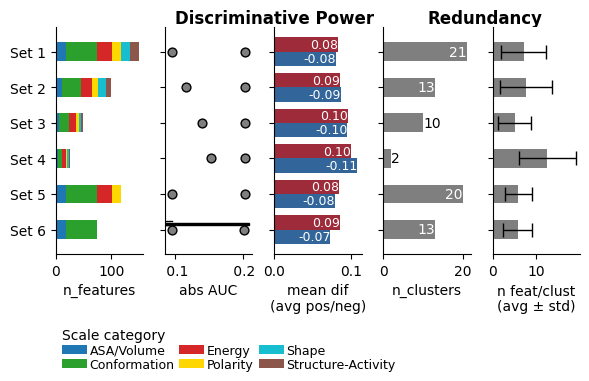

In [3]:
import matplotlib.pyplot as plt
cpp_plot = aa.CPPPlot()
cpp_plot.eval(df_eval=df_eval)
plt.show()

Ticks and the fontsize can be adjusted using the ``plot_settings()`` functions.

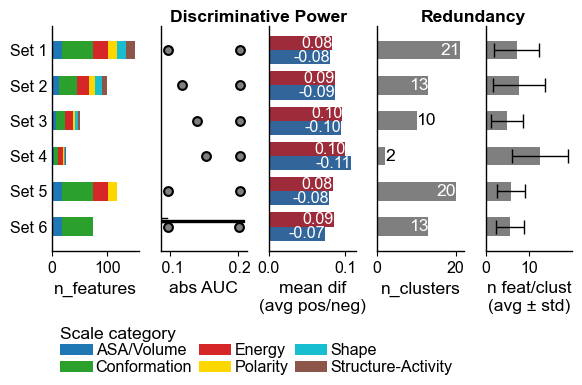

In [4]:
aa.plot_settings(font_scale=0.7, short_ticks_x=True, no_ticks_y=True, weight_bold=False)
cpp_plot.eval(df_eval=df_eval)
plt.show()

**Explanation of Evaluation Plot**

The visualization provides insights into feature set characteristics, displayed from left to right:

a) **Number of Features per Scale Category**: Displayed as a stacked bar chart.

b) **Range of Absolute AUC Values**: Includes minimum, 25%, median, 75%, and maximum values.

c) **Mean Difference**: The average difference between the test and the reference dataset, with positive values in red and negative values in blue.

d) **Number of Clusters**: Based on Pearson correlation between the features.

e) **Average Number of Features per Cluster**.

Metrics (b) and (c) gauge the **Discriminative Power** of the feature sets (higher is better), while (d) and (e) assess the **Numerical Redundancy**, with fewer features per cluster indicating greater diversity.

The ``figsize`` can be adjusted:

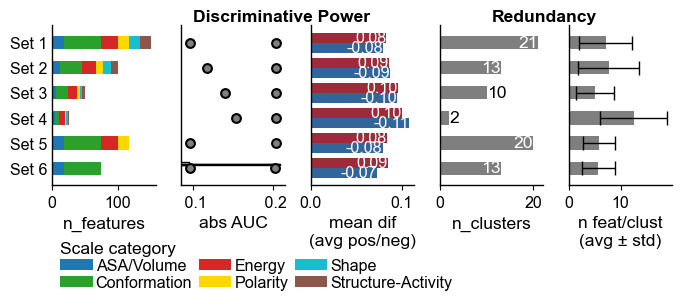

In [5]:
cpp_plot.eval(df_eval=df_eval, figsize=(7, 3))
plt.show()

This might lead to an unappropriated legend spacing. The y position of the legend can be controlled using the ``legend_y`` (default=-0.3) parameter. In addition, we recommend to use the :func:`matplotlib.pyplot.subplots_adjust` to adjust the bottom spacing of the figure:

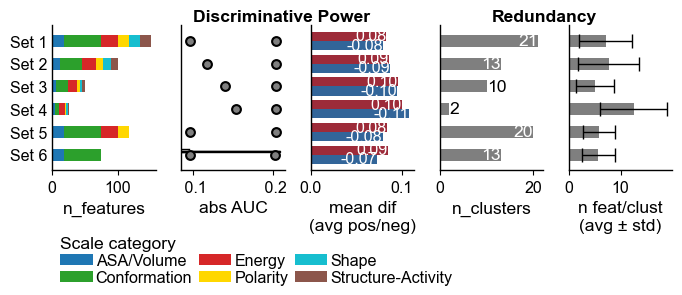

In [6]:
cpp_plot.eval(df_eval=df_eval, figsize=(7, 3), legend_y=-0.4)
plt.subplots_adjust(wspace=0.25, hspace=0, bottom=0.4)
plt.show()

Alternatively, you can simply remove the legend setting ``legend=False``

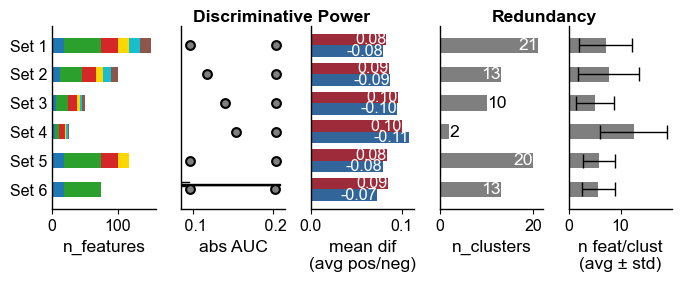

In [7]:
cpp_plot.eval(df_eval=df_eval, figsize=(7, 3), legend=False)
plt.show()

Customize the the x-limits of each subplot using the ``dict_xlims`` parameter:

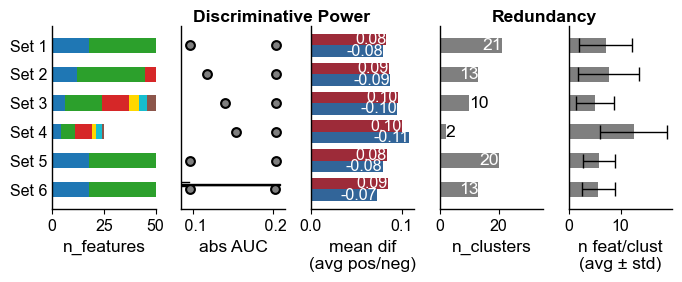

In [8]:
dict_xlims = {0: (0, 50), 3: (0, 35)} # Adjust first and fourth subplot
cpp_plot.eval(df_eval=df_eval, figsize=(7, 3), legend=False, dict_xlims=dict_xlims)
plt.show()

You can change the colors of the scale categories using the ``dict_color`` argument. We first get the default scale category color dictionary using the ``plt_get_cdict`` function with ``name='DICT_CAT'`` and a new color list using ``plot_get_clist``:

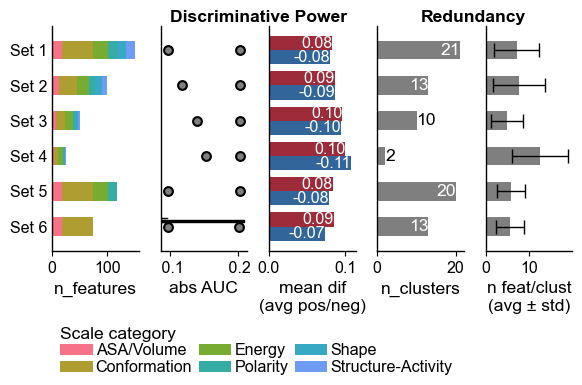

In [9]:
dict_color = aa.plot_get_cdict(name="DICT_CAT")
list_colors = aa.plot_get_clist(n_colors=10)
# New color dict
dict_color = dict(zip(dict_color, list_colors))
cpp_plot.eval(df_eval=df_eval, dict_color=dict_color)
plt.show()

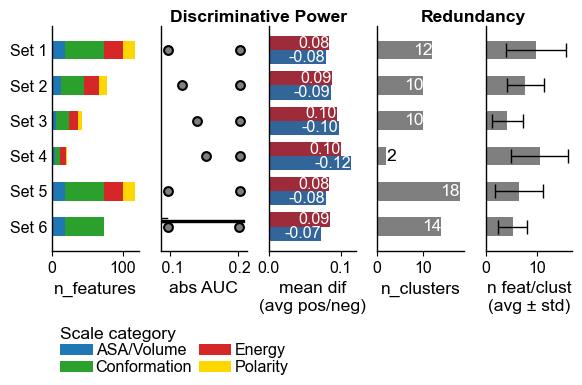

In [10]:
cpp = aa.CPP(df_parts=df_parts)
df_eval = cpp.eval(list_df_feat=list_df_feat, labels=labels, list_cat=list_cat[0:4])
cpp_plot.eval(df_eval=df_eval, list_cat=list_cat[0:4])
plt.show()

To adjust the set names, provide the customized names via the ``names_feature_sets`` argument to the ``CPP().eval()`` method: 

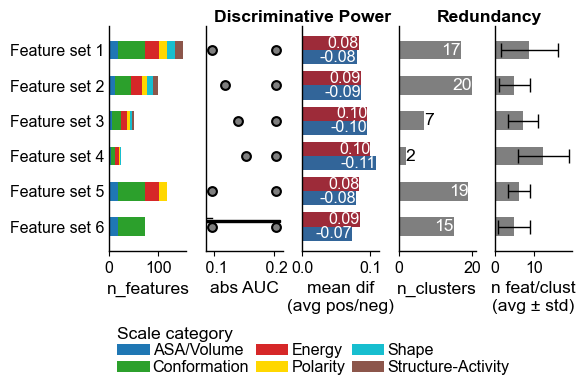

In [11]:
cpp = aa.CPP(df_parts=df_parts)
names_feature_sets = [f"Feature set {i}" for i in range(1, 7)]
df_eval = cpp.eval(list_df_feat=list_df_feat, labels=labels, names_feature_sets=names_feature_sets)
cpp_plot.eval(df_eval=df_eval)
plt.show()

If only a subset of scale categories should be considered, the ``list_cat`` argument should be adjusted in both the ``CPP().eval()`` and the ``CPPPlot().eval()`` method: